In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("./res_train.json", "r") as f:
    data = json.load(f)

In [3]:
y       = np.array(data["y"])
mu      = np.array(data["mu"])
std     = np.array(data["std"])
cluster = np.array(data["cluster"])

In [4]:
points = cluster[:,3,:]

In [5]:
points.argmax(axis=1)

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
import datetime
from os import makedirs
from os.path import exists

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from matplotlib import gridspec
from torch.autograd import Variable

#sns.set(style="whitegrid")
#sns.axes_style(style={"axes.grid": True})
def plot_timeseries(input, pred, std, num_std=3, downsample_step=4, xlabel=None, ylabel=None, title=None, save_to=None):
    plt.clf()
    num_samples, num_channels = input.shape
    downsample_every_nth = [i for i in range(0, input.shape[0], downsample_step)]

    plt.figure(figsize=(40, 60))

    for idx in range(num_channels):
        x = idx % num_channels
        y = idx % 1
        gs = gridspec.GridSpec(num_channels, 2, width_ratios=[4, 1], height_ratios=[1]*num_channels)
        ax0 = plt.subplot(gs[x, y])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        ax0.plot(input[downsample_every_nth, idx], color='black', label="true signal")
        ax0.plot(pred[downsample_every_nth, idx], color='red', label="mean signal")
        # plot lower and upper confidence curves
        ax0.plot(pred[downsample_every_nth, idx] - std[downsample_every_nth, idx] * num_std, color='blue', alpha=0.1)
        ax0.plot(pred[downsample_every_nth, idx] + std[downsample_every_nth, idx] * num_std, color='blue', alpha=0.1)

        ax0.fill_between(x=[i for i in range(input[downsample_every_nth].shape[0])],
                         y1=pred[downsample_every_nth, idx] + std[downsample_every_nth, idx] * num_std,
                         y2=pred[downsample_every_nth, idx] - std[downsample_every_nth, idx] * num_std,
                         facecolor="blue", alpha=0.1, label="3 std. confidence interval")

        if idx == 0:
            ax0.legend(loc=1, fontsize=20)

        ax1 = plt.subplot(gs[x, y + 1])
        sns.distplot(input[downsample_every_nth, idx], ax=ax1, vertical=False, bins=15, kde=False,
                     hist_kws={"color": "blue", "range": (np.min(input), np.max(input)), "alpha": 0.5},
                     kde_kws={"color": "blue", "lw": 3})
        plt.xlabel('frequency')
    plt.tight_layout()
    plt.title(title)
    plt.show()

In [7]:
cc = cluster.argmax(axis=1)

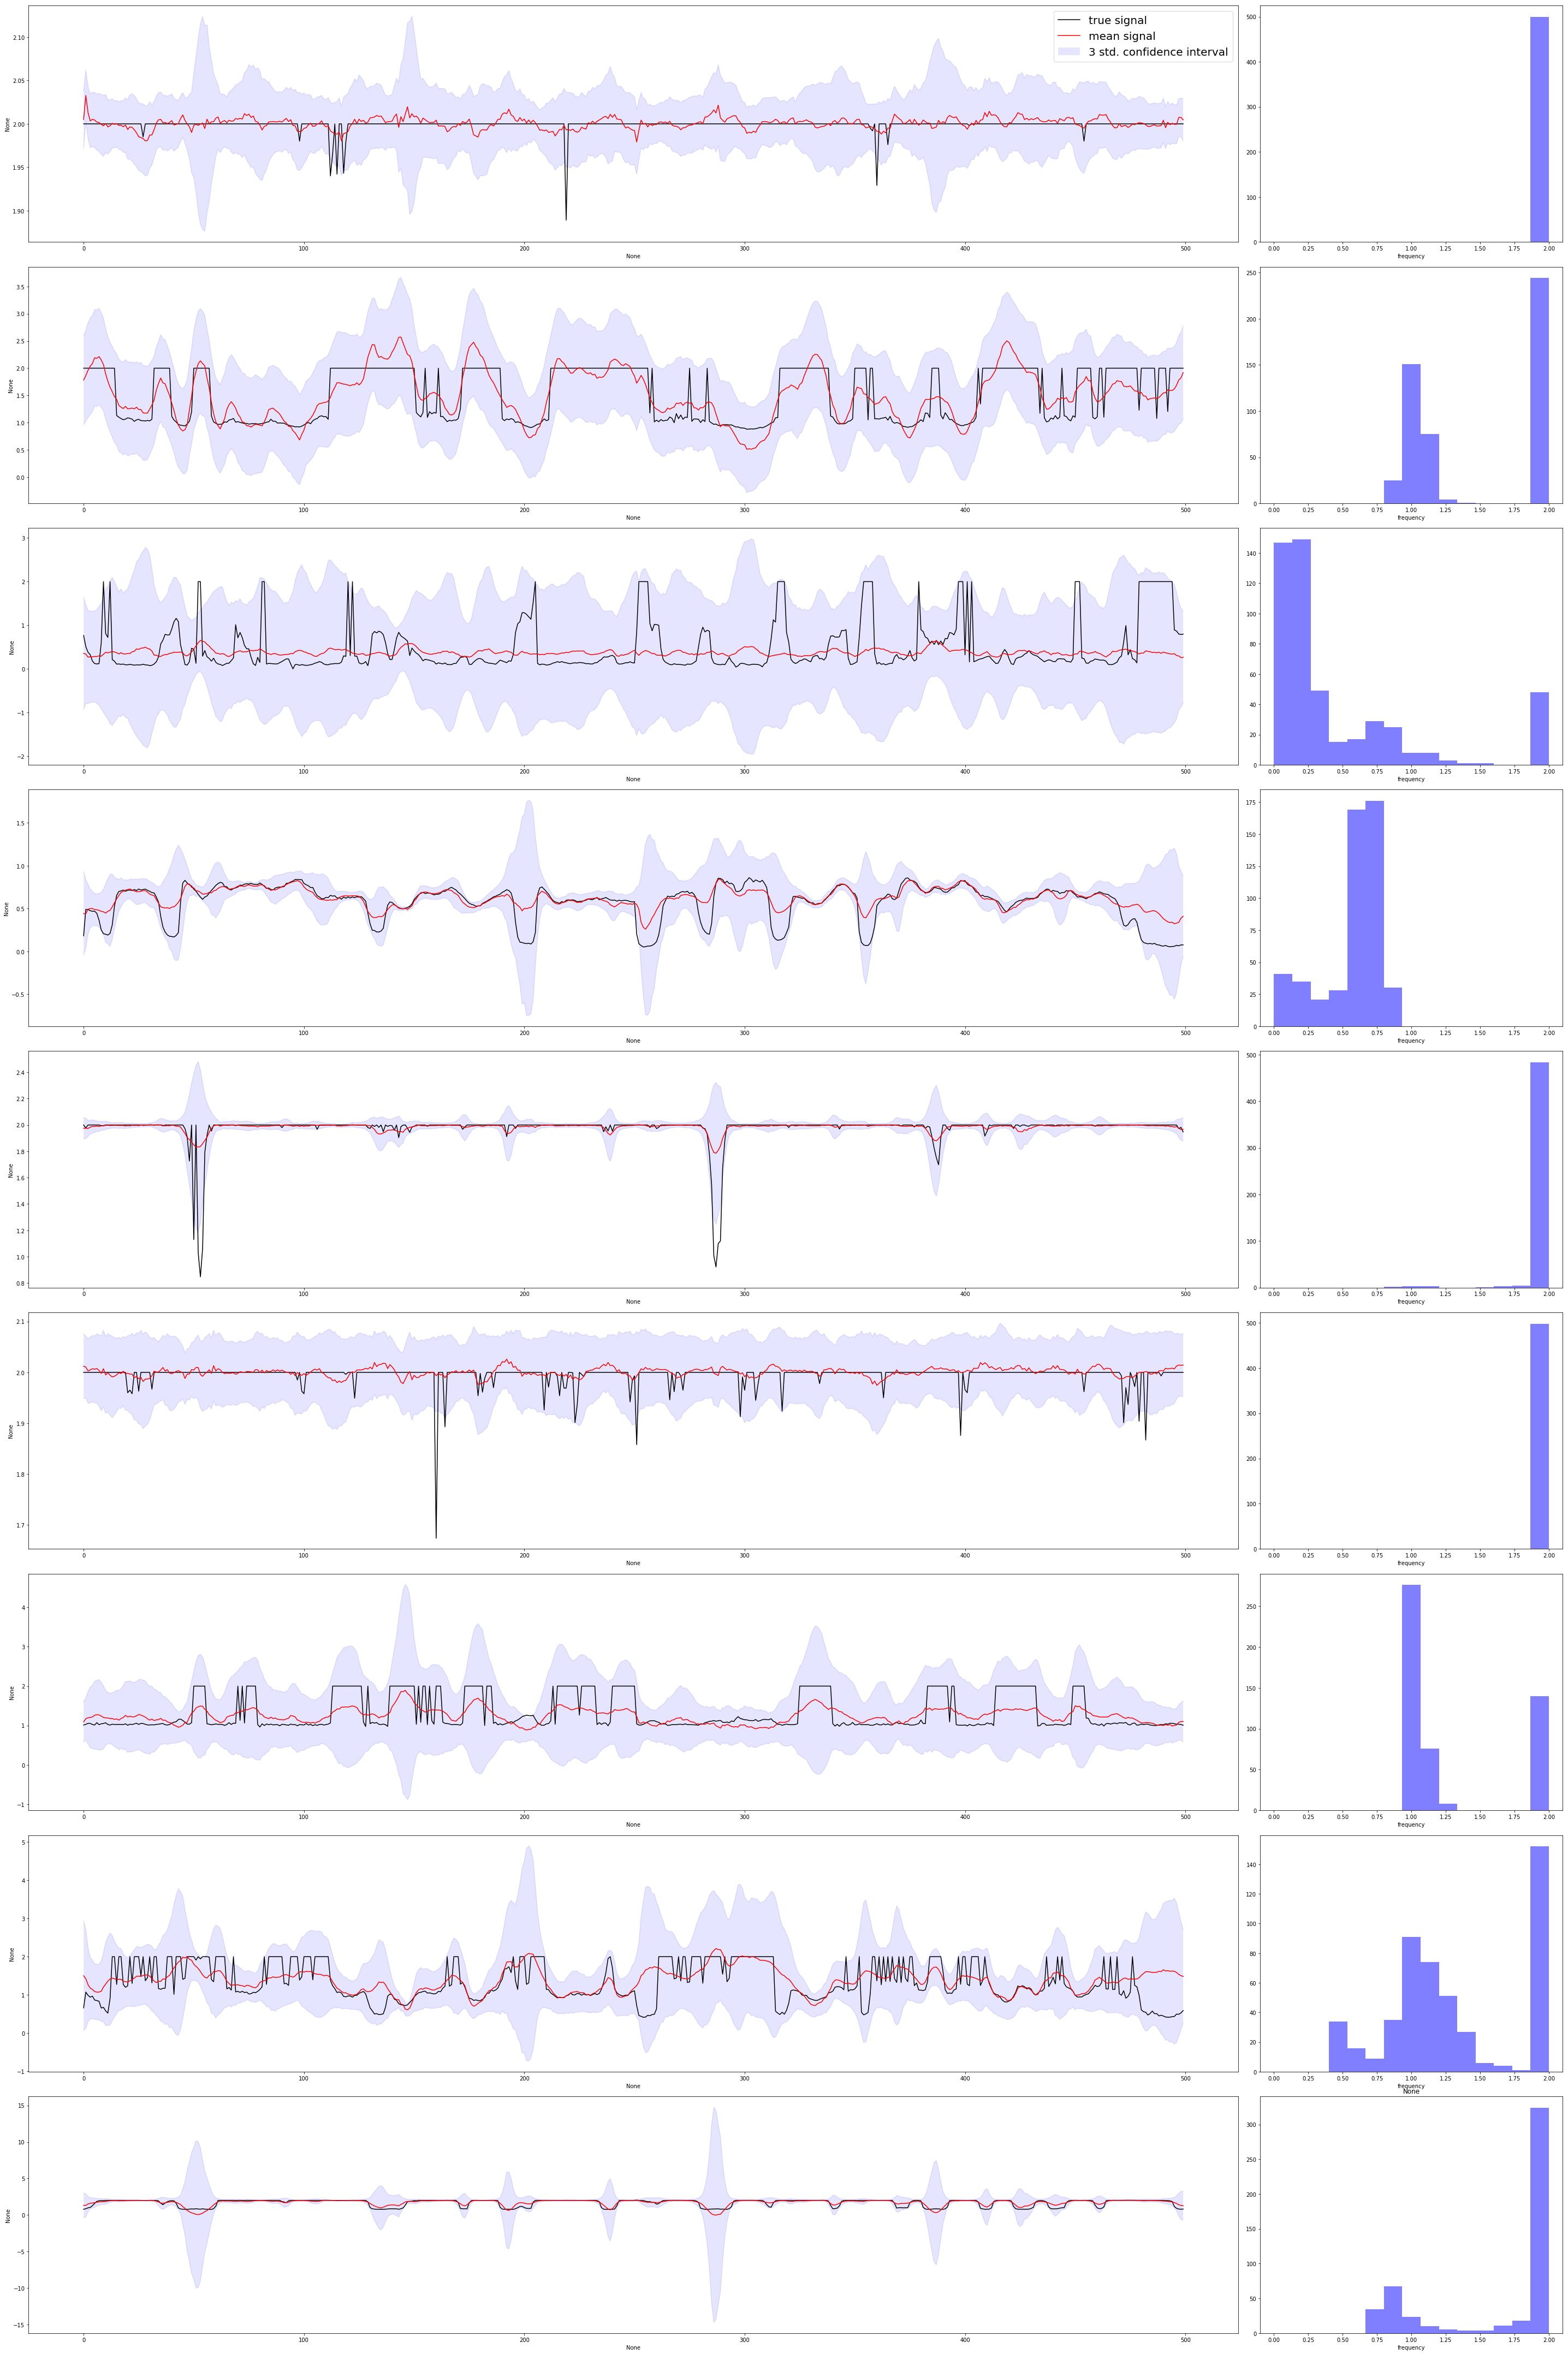

In [8]:
plot_timeseries(y, mu, std)

In [156]:
import datetime
from os import makedirs
from os.path import exists

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from matplotlib import gridspec
from torch.autograd import Variable

#sns.set(style="whitegrid")
#sns.axes_style(style={"axes.grid": True})
def plot_clusterization(input, pred, std, clusters, num_std=3, downsample_step=1, xlabel=None, ylabel=None, title=None, save_to=None):
    plt.clf()
    num_samples, num_channels = input.shape
    downsample_every_nth = [i for i in range(0, input.shape[0], downsample_step)]

    plt.figure(figsize=(40, 60))
    
    cmap = {0: "green", 
            1: "blue", 
            2: "yellow", 
            3: "gray", 
            4: "red", 
            5: "black",
            6: "violet", 
            7: "cyan",
            8: "black"}
    #cmap_list = [cmap[i] for i in range(9)]

    for idx in range(num_channels):
        x = idx % num_channels
        y = idx % 1
        gs = gridspec.GridSpec(num_channels, 2, width_ratios=[4, 1], height_ratios=[1]*num_channels)
        ax0 = plt.subplot(gs[x, y])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #ax0.plot(input[downsample_every_nth, idx], color='black', label="true signal", alpha=0.1)
        #ax0.plot(pred[downsample_every_nth, idx], color='red', label="mean signal", alpha=0.5)
        clusters_color = [cmap[i] for i in clusters[downsample_every_nth, idx]]
        ax0.scatter(downsample_every_nth, 
                    pred[downsample_every_nth, idx], 
                    c=clusters_color, vmin=0, vmax=9, label="clusters " + str(np.unique(clusters[downsample_every_nth, idx])))
        # plot lower and upper confidence curves
        ax0.fill_between(x=[i for i in range(len(downsample_every_nth))],
                         y1=pred[downsample_every_nth, idx] + std[downsample_every_nth, idx] * num_std,
                         y2=pred[downsample_every_nth, idx] - std[downsample_every_nth, idx] * num_std,
                         facecolor="cyan", alpha=0.1, label="3 std. confidence interval")
        #ax0.set_ylim([-0.5, 2.5])

        ax0.legend(loc=1, fontsize=20)
        ax0.grid()

        ax1 = plt.subplot(gs[x, y + 1])
        N, bins, patches = ax1.hist(clusters[downsample_every_nth, idx], linewidth=4, range=(0, 9), density=True)
        
        for i in range(len(cmap)):
            patches[i].set_facecolor(cmap[i])
        ax1.grid()
        
        plt.xlabel('frequency')
    plt.tight_layout()
    plt.title(title)
    plt.show()

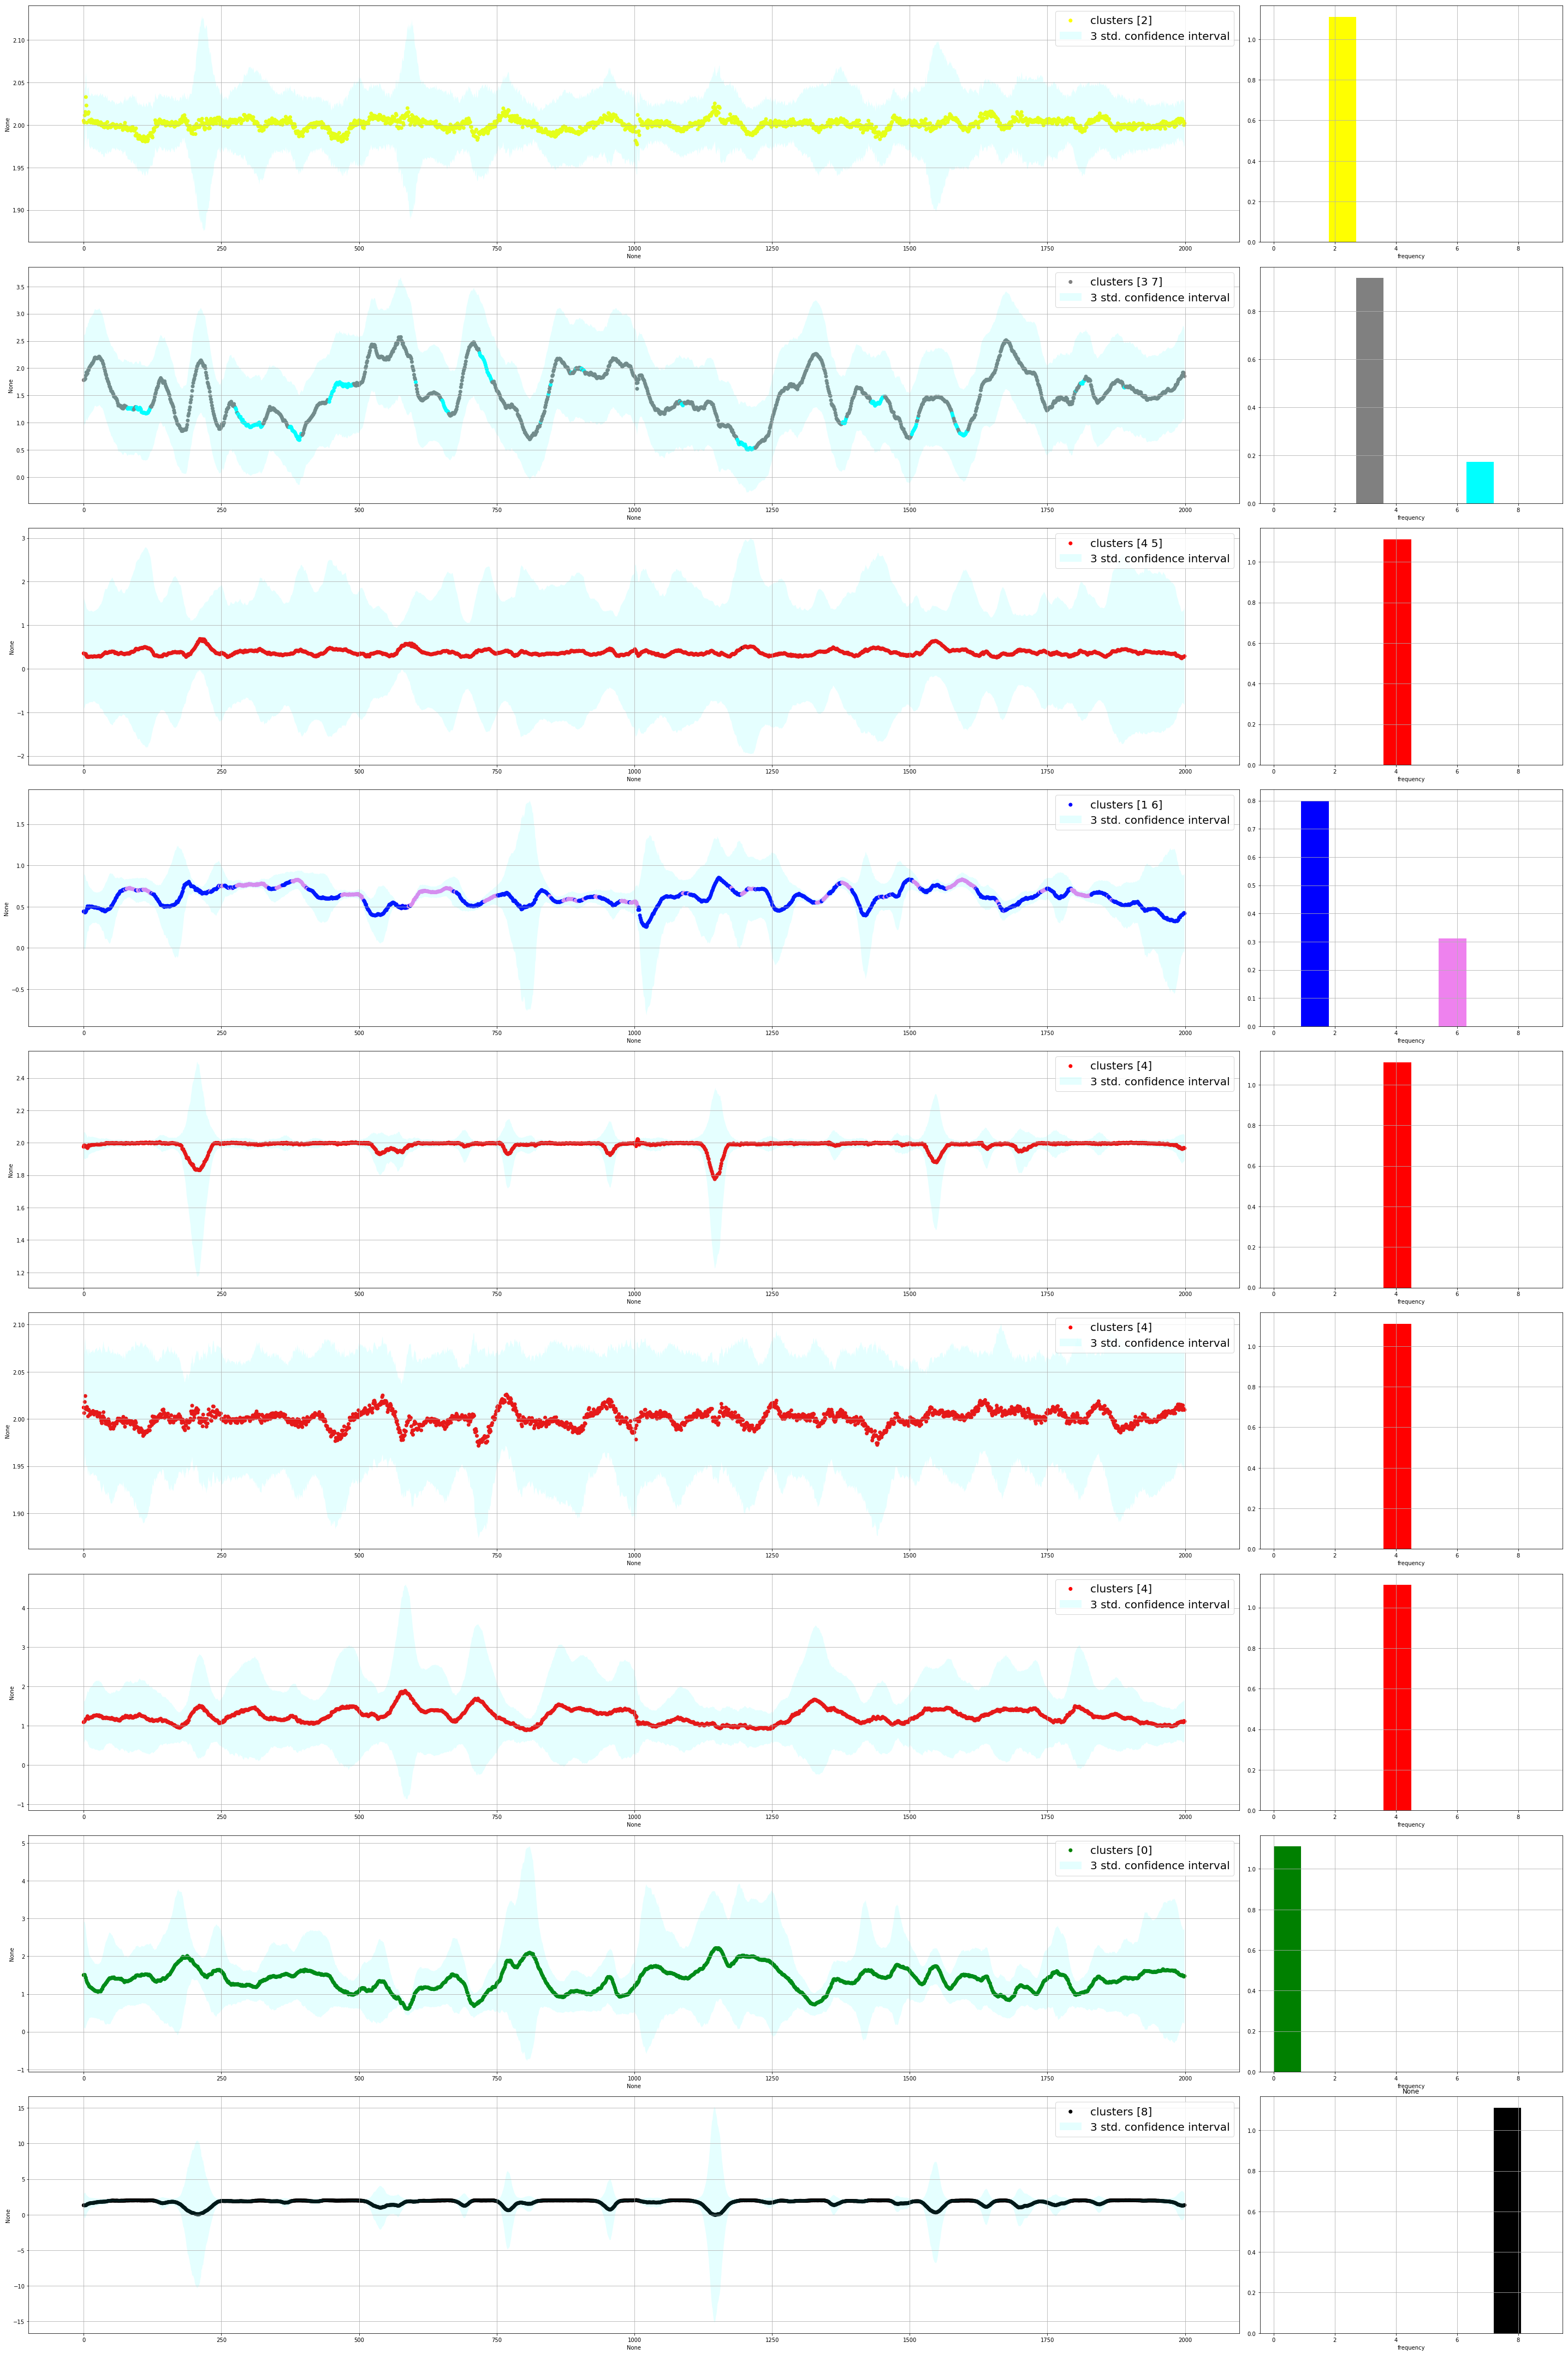

In [157]:
plot_clusterization(y, mu, std, cc)

In [47]:
(cc[:,3]==).sum() / 2000

0.71950000000000003